In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv("C:\\Users\\NITIN GUPTA\\Malignant Comments Classifier Project\\train.csv")
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
df_test = pd.read_csv("C:\\Users\\NITIN GUPTA\\Malignant Comments Classifier Project\\test.csv")
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


# Data Analysis

In [5]:
print("We have {} Rows and {} Columns in our dataframe".format(df_train.shape[0], df_train.shape[1]))
df_train.head(20)

We have 159571 Rows and 8 Columns in our dataframe


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [6]:
df_train.isna().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

we can confirm that there are no missing values in any of the columns present in our training dataset.

<AxesSubplot:>

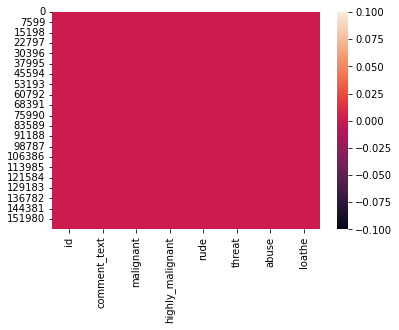

In [7]:
sns.heatmap(df_train.isna())

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
# checking ratio of data which contains malignant comments and normal or unoffensive comments.
output_labels = df_train.columns[2:]

# counting non-zero rows i.e. Malignant Comments
malignant_comments = len(df_train[df_train[output_labels].any(axis=1)])

# counting rows containing zero i.e. Normal Comments
normal_comments = len(df_train)-malignant_comments

print(f"Total Malignant Comments: {malignant_comments} ({round(malignant_comments*100/len(df_train),2)}%)")
print(f"Total Normal Comments: {normal_comments} ({round(normal_comments*100/len(df_train),2)}%)")

Total Malignant Comments: 16225 (10.17%)
Total Normal Comments: 143346 (89.83%)


As per above description 10.17% is maglignant comments and 89.83% normal comments

In [10]:
#Adding additional column original_length
df = df_train.copy()
df['original_length'] = df.comment_text.str.lower()
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"""\nmore\ni can't make any real suggestions on ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"you, sir, are my hero. any chance you remember..."


# Data Cleansing

In [11]:
# Drop Id column as no relevance

df.drop(columns= ['id'], inplace= True)
df['comment_text'] = df.comment_text.str.lower()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it..."
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,"""\nmore\ni can't make any real suggestions on ..."
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,"you, sir, are my hero. any chance you remember..."


# Text Processing

In [12]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize, regexp_tokenize

In [13]:
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [14]:
# Lowercasing the alphabets
df['comment_text'] = df['comment_text'].apply(lambda x : x.lower())
df['comment_text'] = df['comment_text'].apply(lambda x : decontracted(x))

# Removing punctuations from the review
df['comment_text'] = df['comment_text'].str.replace('[^\w\s]','')
df['comment_text'] = df['comment_text'].str.replace('\n',' ')

# Removing Stopwords

In [15]:
stop = set(stopwords.words('english'))

for ch in range(ord('a'),ord('z')+1):
    stop.update(chr(ch))
    
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us",
                "ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve",
                "rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop.update(custom_words)

In [16]:
print("New list of custom stop words are as follows:\n\n")
print(stop)

New list of custom stop words are as follows:


{'himself', 'shan', 'being', 'then', 'some', 'all', 'oh', "wouldn't", 'theirs', 'she', 'itself', 'with', "hasn't", 'own', 'is', 'our', 'nvm', 'where', "you're", 'having', 'ilu', 'u', 'aren', "he'll", 'hers', 'this', "hadn't", 'd', "won't", 'ok', 'and', 'wouldn', 'he', 'doing', "there's", 'h', 'am', 'while', 'from', "haven't", 'the', 'who', 'they', 'won', 'at', 'whom', 'here', 'such', 'in', 'p', 'him', "mightn't", 'w', 'j', 'shouldn', 'z', 'can', 'was', 'same', 'no', 'bbq', 'themselves', 'hmm', 'haven', 'its', 'hasn', 'isn', 'again', 'a', 'very', 'them', 'me', "i'll", 'us', 'umm', 'has', "d'aww", 'yours', 'myself', 'rofl', 'couldn', 'when', "i'm", 'an', 'lmfao', 'l', 't', 've', 'e', 'above', 'm', 'these', 'be', 'for', 'omg', 'do', "should've", "that's", 'have', 'so', 'each', 'only', 'mightn', 'your', 'both', 'their', 'any', 'herself', 'my', 'ofc', 'after', 'other', 'ily', "isn't", 'if', 'his', "didn't", 'out', 'but', 'y', 'below', 'ain', '

In [17]:
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Lemmatization

In [18]:
lemmatizer = WordNetLemmatizer()

In [19]:
from tqdm  import tqdm
comment_text = []
for sentance in tqdm(df['comment_text'].values):
    sent = decontracted(sentance)
    sent =' '.join(lemmatizer.lemmatize(e) for e in sent.split())
    comment_text.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 159571/159571 [00:34<00:00, 4682.61it/s]


In [20]:
df['comment_text']= comment_text

# Text Normalization

In [21]:
def norm_words(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['comment_text'] = df['comment_text'].apply(lambda x : norm_words(x))

In [22]:
#Removing Stemming words

stem_word = SnowballStemmer('english')
df.comment_text = df.comment_text.apply(lambda x: ' '.join(stem_word.stem(word) for word in word_tokenize(x)))
df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
41063,though think arthur get articl bit hesit other...,0,0,0,0,0,0,"though, i think arthur should get his own arti..."
93390,wait got roger sing lyric chorus case rick backup,0,0,0,0,0,0,"wait, i've got it. roger sings the lyrics to t..."
147198,north shoreman relev specif articl suggest mat...,0,0,0,0,0,0,"north shoreman, which relevant and specific ar..."
8933,rate vchip power tvpgl hell shit piss set chai...,0,0,0,0,0,0,some ratings from the vchip \n\n1. the power: ...
16036,page would merit head section chernobyl disast...,0,0,0,0,0,0,"""\n\n this page would merit its own heading se..."
35030,imag mark delet copyright violat articl delet ...,0,0,0,0,0,0,"""\nthe image was marked for deletion as a copy..."
40807,link articl though web site us pcmagcom digit ...,0,0,0,0,0,0,"""\n the link for this article is now http://ww..."
42933,tiger wrong cancan girl wear panti,0,0,0,0,0,0,tiger is wrong about cancan girls not wearing ...
71509,tvmediainsight recent discoveri show peopl wor...,0,0,0,0,0,0,"""\n\n tvmediainsights \n\nrecent discoveries s..."
26500,th amend task forc kevin appreci consider revi...,0,0,0,0,0,0,"10th amendment task force \n\nkevin,\ni apprec..."


In [23]:
df["cleaned_length"] = df.comment_text.str.len()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length,cleaned_length
0,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...,139
1,daww match background colour seem stuck thank ...,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...,62
2,man realli tri edit war guy constant remov rel...,0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it...",112
3,make real suggest improv wonder section statis...,0,0,0,0,0,0,"""\nmore\ni can't make any real suggestions on ...",316
4,sir hero chanc rememb page,0,0,0,0,0,0,"you, sir, are my hero. any chance you remember...",26


# Data Visualization

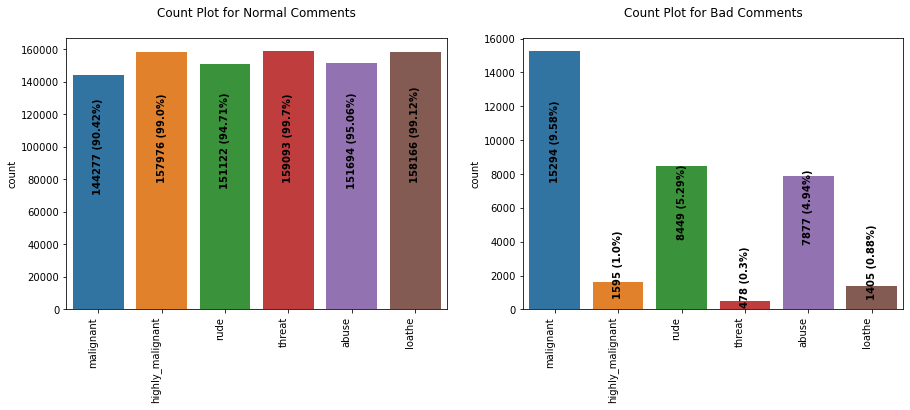

In [24]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

for i in range(2):
    sns.countplot(data=df[output_labels][df[output_labels]==i], ax=ax[i])
    if i == 0:
        ax[i].set_title("Count Plot for Normal Comments\n")
    else:
        ax[i].set_title("Count Plot for Bad Comments\n")
        
    ax[i].set_xticklabels(output_labels, rotation=90, ha="right")
    p=0
    for prop in ax[i].patches:
        count = prop.get_height()
        s = f"{count} ({round(count*100/len(df),2)}%)"
        ax[i].text(p,count/2,s,rotation=90, ha="center", fontweight="bold")
        p += 1

plt.show()

As per above visualization Magninant comments are less than normal comments

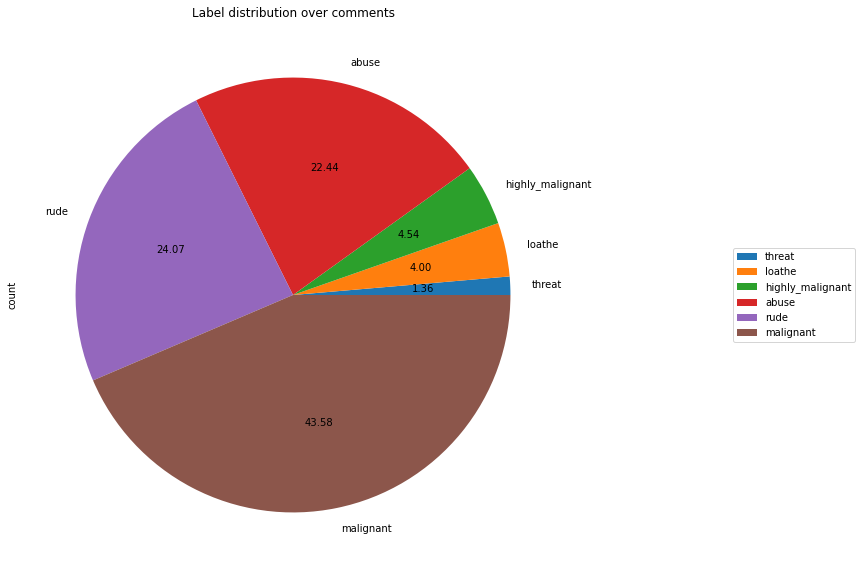

In [25]:
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df_train[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (15, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [26]:
df_train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


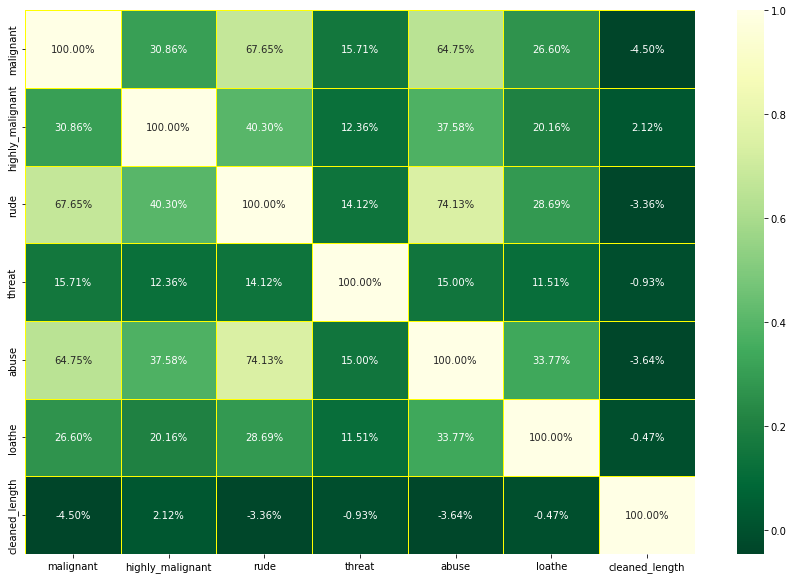

In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), linewidth=0.5, linecolor='yellow', fmt='.02%', cmap='YlGn_r', annot=True)
plt.show()

# Word Cloud

In [28]:
from wordcloud import WordCloud

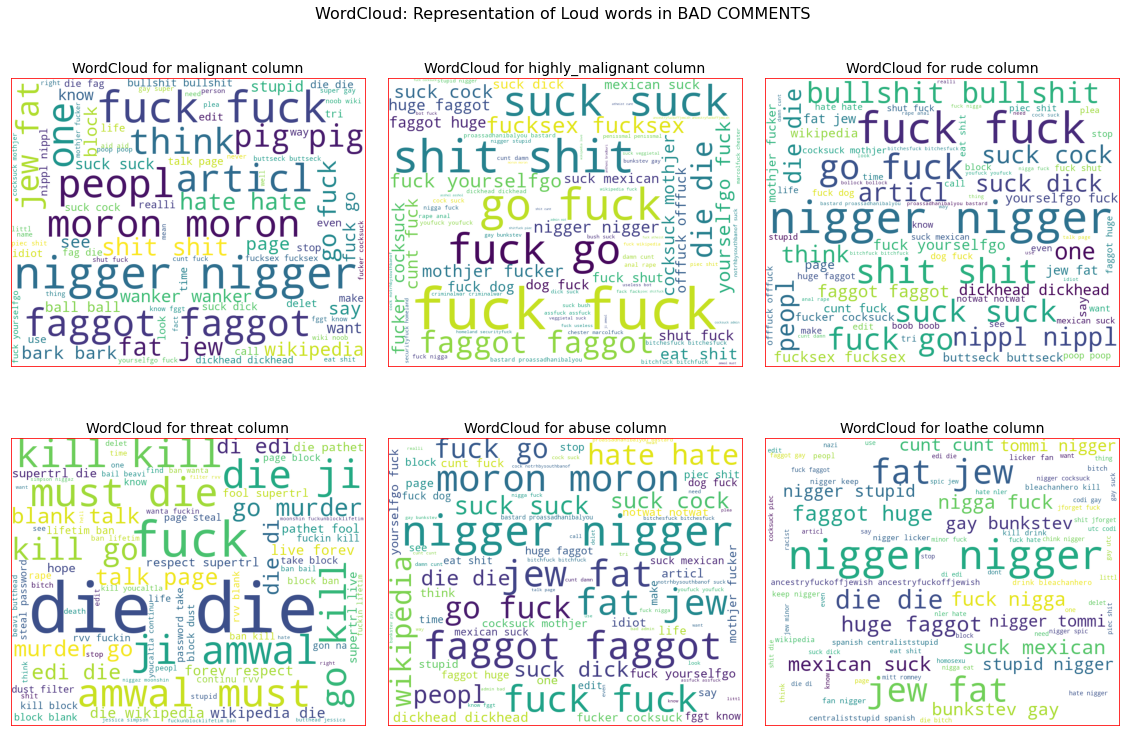

In [29]:
cols = 3
rows = len(output_labels)//cols
if len(output_labels) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(16,rows*cols*1.8))
fig.subplots_adjust(top=0.8, hspace=0.3)

p=1
for i in output_labels:
    word_cloud = WordCloud(height=650, width=800,
                           background_color="white",max_words=80).generate(' '.join(df.comment_text[df[i]==1]))
    ax = fig.add_subplot(rows,cols,p)
    ax.imshow(word_cloud)
    ax.set_title(f"WordCloud for {i} column",fontsize=14)
    for spine in ax.spines.values():
        spine.set_edgecolor('r')
       
    ax.set_xticks([])
    ax.set_yticks([])
    p += 1

fig.suptitle("WordCloud: Representation of Loud words in BAD COMMENTS",fontsize=16)
fig.tight_layout(pad=2)
plt.show()

Observation:
- From wordcloud of `malignant comments`, it is clear that it mostly consists of words like fuck, nigger, moron, hate, suck ect.
- From wordcloud of `highly_malignant comments`, it is clear that it mostly consists of words like ass, fuck, bitch, shit, die, suck, faggot ect.
- From wordcloud of `rude comments`, it is clear that it mostly consists of words like nigger, ass, fuck, suck, bullshit, bitch etc.
- From wordcloud of `threat comments`, it is clear that it mostly consists of words like die, must die, kill, murder etc.
- From wordcloud of `abuse comments`, it is clear that it mostly consists of words like moron, nigger, fat, jew, bitch etc.
- From wordcloud of `loathe comments`, it is clear that it mostly consists of words like nigga, stupid, nigger, die, gay cunt etc.

# Model Building

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.sparse import csr_matrix

In [31]:
#Converting text to vectors using TfidfVectorizer

tfidf = TfidfVectorizer(max_features=4000)
features = tfidf.fit_transform(df.comment_text).toarray()

In [32]:
features.shape

(159571, 4000)

In [34]:
# input variables
x = features

# output variables
y = csr_matrix(df[output_labels]).toarray()

# checking shapes of input and output variables to take care of data imbalance issue
print("Input Variable Shape:", x.shape)
print("Output Variable Shape:", y.shape)

Input Variable Shape: (159571, 4000)
Output Variable Shape: (159571, 6)


Creating a function for train and teat model

In [35]:
import timeit, sys
from sklearn import metrics
import tqdm.notebook as tqdm
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import hamming_loss, log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, multilabel_confusion_matrix

In [36]:
def build_models(models,x,y,test_size= 0.33,random_state= 42):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=test_size, random_state= random_state)
    
    for i in tqdm.tqdm(models,desc="Building Models"):
        start_time = timeit.default_timer()
        
        sys.stdout.write("\n=======================================================================================\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n=======================================================================================\n")
        
        br_clf = BinaryRelevance(classifier=models[i]["name"],require_dense=[True,True])
        print("Training: ",br_clf)
        br_clf.fit(xtrain,ytrain)
        
        print("Testing: ")
        predict_y = br_clf.predict(xtest)
        
        ham_loss = hamming_loss(ytest,predict_y)
        sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
        ac_score = accuracy_score(ytest,predict_y)
        sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
        cl_report = classification_report(ytest,predict_y)
        sys.stdout.write(f"\n{cl_report}")
        
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        models[i]["trained"] = br_clf
        models[i]["hamming_loss"] = ham_loss
        models[i]["accuracy_score"] = ac_score
        models[i]["classification_report"] = cl_report
        models[i]["predict_y"] = predict_y
        models[i]["time_taken"] = end_time - start_time
                      
        sys.stdout.write("\n=======================================================================================\n")
    
    models["xtrain"] = xtrain
    models["ytrain"] = ytrain
    models["xtest"] = xtest
    models["ytest"] = ytest
    
    return models

In [38]:
models = {"GaussianNB": {"name": GaussianNB()},
          "MultinomialNB": {"name": MultinomialNB()},
          "Logistic Regression": {"name": LogisticRegression()},
          "Random Forest Classifier": {"name": RandomForestClassifier()},
          "Support Vector Classifier": {"name": LinearSVC(max_iter = 3000)},
          "Ada Boost Classifier": {"name": AdaBoostClassifier()},
          "K Nearest Neighbors Classifier": {"name": KNeighborsClassifier()},
          "Decision Tree Classifier": {"name": DecisionTreeClassifier()},
          "Bagging Classifier": {"name": BaggingClassifier(base_estimator=LinearSVC())},
         }

# Taking one forth of the total data for training and testing purpose
half = len(df)//4
trained_models = build_models(models,x[:half,:],y[:half,:])

Building Models:   0%|          | 0/9 [00:00<?, ?it/s]


Current Model in Progress: GaussianNB 
Training:  BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.22098999873401695
	Accuracy Score: 0.46752753513102924
              precision    recall  f1-score   support

           0       0.16      0.79      0.26      1281
           1       0.08      0.48      0.13       150
           2       0.11      0.71      0.18       724
           3       0.02      0.25      0.03        44
           4       0.10      0.65      0.17       650
           5       0.03      0.46      0.06       109

   micro avg       0.11      0.71      0.19      2958
   macro avg       0.08      0.56      0.14      2958
weighted avg       0.12      0.71      0.21      2958
 samples avg       0.05      0.07      0.05      2958
Completed in [26.011405200000013 sec.]

Current Model in Progress: MultinomialNB 
Training:  BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.0243

Testing: 

	Hamming Loss  : 0.020154449930370934
	Accuracy Score: 0.9131029244208128
              precision    recall  f1-score   support

           0       0.85      0.64      0.73      1281
           1       0.52      0.23      0.32       150
           2       0.90      0.66      0.76       724
           3       0.50      0.11      0.19        44
           4       0.78      0.53      0.63       650
           5       0.74      0.24      0.36       109

   micro avg       0.83      0.58      0.68      2958
   macro avg       0.72      0.40      0.50      2958
weighted avg       0.82      0.58      0.67      2958
 samples avg       0.06      0.05      0.05      2958
Completed in [427.8875965999996 sec.]


As per above result Support Vector classifier is the best model with Hamming Loss  : 0.023344727180655778
	Accuracy Score: 0.9052791492593999

# Hyperparameter Tunning

In [42]:
fmod_param = {'estimator__penalty' : ['l1', 'l2'],
              'estimator__loss' : ['hinge', 'squared_hinge'],
              'estimator__multi_class' : ['ovr', 'crammer_singer'],
              'estimator__random_state' : [42, 72, 111]
             }
SVC = OneVsRestClassifier(LinearSVC())
GSCV = GridSearchCV(SVC, fmod_param, cv=3)
xtrain,xtest,ytrain,ytest = train_test_split(x[:half,:], y[:half,:], test_size=0.30, random_state=42)
GSCV.fit(xtrain,ytrain)
GSCV.best_params_

{'estimator__loss': 'hinge',
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l2',
 'estimator__random_state': 42}

In [44]:
Final_Model = OneVsRestClassifier(LinearSVC(loss='hinge', multi_class='ovr', penalty='l2', random_state=42))
Classifier = Final_Model.fit(xtrain, ytrain)
fmod_pred = Final_Model.predict(xtest)
fmod_acc = (accuracy_score(ytest, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)
h_loss = hamming_loss(ytest,fmod_pred)*100
print("Hamming loss for the Best Model is:", h_loss)

Accuracy score for the Best Model is: 91.41042780748663
Hamming loss for the Best Model is: 1.9928141711229945


# Confusion Matrix

In [46]:
print("Confusion matrix:\n\n", multilabel_confusion_matrix(ytest, fmod_pred))

Confusion matrix:

 [[[10713    80]
  [  462   713]]

 [[11832     1]
  [  134     1]]

 [[11265    45]
  [  201   457]]

 [[11930     0]
  [   38     0]]

 [[11268   104]
  [  284   312]]

 [[11869     3]
  [   79    17]]]


# Saving Model

In [49]:
import joblib

In [47]:
best_model = trained_models['Support Vector Classifier']['trained']

In [50]:
joblib.dump(best_model,open('Malignant_comments_classifier.pkl','wb'))

# Test Data Set

- Use the test dataset
- Remove null values if any
- Drop column id
- Convert comment text to lower case and replace '\n' with single space
- Keep only text data ie. a-z' and remove other data from comment text
- Remove stop words and punctuations
- Apply Stemming using SnowballStemmer
- Convert text to vectors using TfidfVectorizer
- Load saved or serialized best model
- Predict values and create a new CSV file

In [51]:
#Remove null values
if df_test.isnull().sum()[1] != 0:
    df_test.dropna(inplace=True)
    
# Drop coulmn id
df_test.drop(columns=['id'],inplace=True)

# Convert comment text to lower case and replace '\n' with single space
df_test["comment_text"] = df_test.comment_text.str.lower()
df_test["comment_text"] = df_test.comment_text.str.replace('\n',' ')

# Keep only text data i.e., a-z' and remove other data from comment text.
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

# Remove stopwords
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop).strip())

# Remove punctuations
df_test.comment_text = df_test.comment_text.str.replace("[^\w\d\s]","")

# Apply Stemming using SnowballStemmer
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(stem_word.stem(word) for word in word_tokenize(x)))

print(df_test.info(memory_usage="deep"))

# Convert text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = 'word', max_features=4000)
test_features = tfidf.fit_transform(df_test.comment_text).toarray()

# Load saved or serialized model and predict
model_loaded = joblib.load('Malignant_comments_classifier.pkl')

# Make predictions and view the results
predict_test = model_loaded.predict(test_features)

# Saving predicted values into a CSV file
pd.DataFrame(predict_test.toarray()).to_csv('Predicted_test_output.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_text  153164 non-null  object
dtypes: object(1)
memory usage: 37.2 MB
None


MemoryError: Unable to allocate 4.56 GiB for an array with shape (153164, 4000) and data type float64